In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

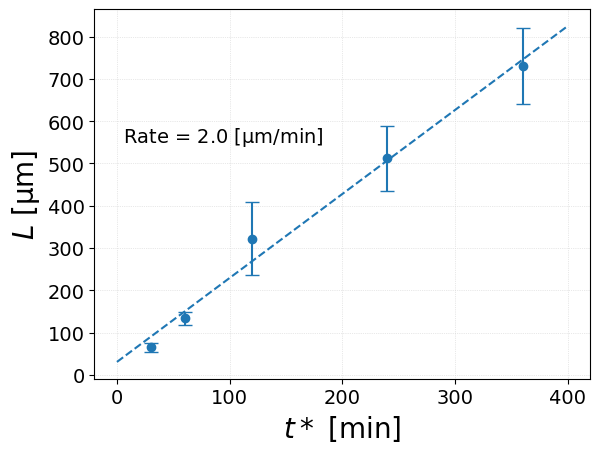

In [96]:
# Setup the dataframe with t* and thickness data
data = {
    't*': [30, 60, 120, 240, 360],
    'L': [65, 134, 322, 512, 730],
    'L_stdv': [10, 15, 86, 76, 90]
}  # time in minutes, FE in %
df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots()

plt.errorbar(df['t*'], df['L'], yerr=df['L_stdv'], fmt='o', capsize=5, c='C0', label='Label')
#ax.plot(df['t*'], df['L'], marker='o', linestyle='none', c='C0', label='100 ${\mathrm{mA/cm^2}}$')


x_fit = np.linspace(0, 400, 100)
m, b = np.polyfit(df['t*'], df['L'], 1)
y_fit = m * x_fit + b
rate = f'{(m):0.1f}'
rate = str(rate)
ax.plot(x_fit, y_fit, linestyle='dashed')

ax.set_xlabel('$t*$ [min]', size=20)
ax.set_ylabel('$L$ ${\mathrm{[\mu m]}}$', size=20)
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.legend(fontsize=12)
ax.grid(color='lightgrey', linestyle='dotted', linewidth=0.5)
ax.text(5, 550, 'Rate = ' + rate + ' ${\mathrm{ [\mu m/min]}}$', size=14)


fig.savefig('L_vs_t*_100mAcm2.png', bbox_inches='tight', dpi=500)

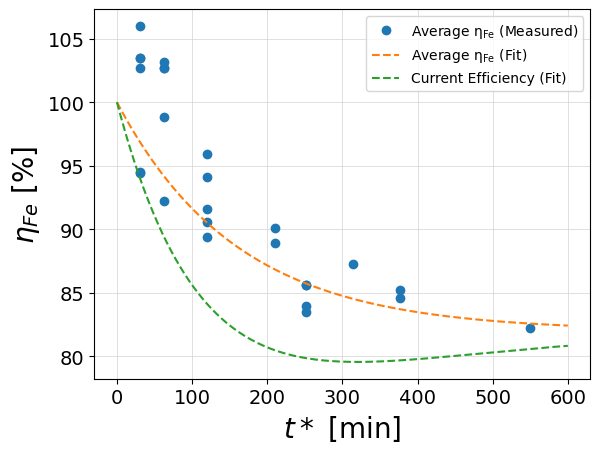

In [11]:
# Setup the dataframe with time and FE data
data = {
    't*': [120, 120, 120, 252, 252, 120, 210, 210, 63, 31, 31, 63, 63, 63, 63, 31, 31, 31, 31, 120, 377, 550, 377, 314, 252, 252], 
    'FE': [91.6, 90.6, 89.4, 83.5, 84.0, 94.1, 88.9, 90.1, 102.7, 103.5, 106.0, 98.8, 103.2, 92.2, 102.7, 103.5, 102.7, 94.5, 94.4, 95.9, 84.6, 82.2, 85.2, 87.3, 85.6, 85.6]
}  # time in minutes, FE in %
df = pd.DataFrame(data)

# Group by x and calculate mean and standard deviation
grouped = df.groupby('t*').agg({'FE': ['mean', 'std']})
grouped.columns = ['mean_FE', 'std_FE']  # Rename columns for clarity

# Fit Data to a smooth curve
t_fit = np.linspace(0, 600, 600)
FE_fit = 100-18*(1-np.exp(-t_fit/160))
# Calculate instantaneous FE at each time
dFE = np.gradient(FE_fit, t_fit)
inst_FE_fit = t_fit*dFE+FE_fit

# Fit Data to a two lines
t_fit1 = np.linspace(0, 250, 250)
FE_fit1 = 103 - 0.08*t_fit1
t_fit2 = np.linspace(250, 600, 350)
FE_fit2 = 85 - 0.005*t_fit2
# Calculate instantaneous FE at each time
dFE1 = np.gradient(FE_fit1, t_fit1)
inst_FE_fit1 = t_fit1*dFE1+FE_fit1

dFE2 = np.gradient(FE_fit2, t_fit2)
inst_FE_fit2 = t_fit2*dFE2+FE_fit2



# Plot
fig, ax = plt.subplots()

ax.plot(df['t*'], df['FE'], marker='o', linestyle='none', c='C0', label='Average ${\mathrm{\eta_{Fe}}}$ (Measured)')
ax.plot(t_fit, FE_fit, marker='none', linestyle='--', c='C1', label='Average ${\mathrm{\eta_{Fe}}}$ (Fit)')
ax.plot(t_fit, inst_FE_fit, marker='none', linestyle='--', c='C2', label='Current Efficiency (Fit)')

#ax.plot(t_fit1, FE_fit1, marker='none', linestyle='--', c='C3', label='Average ${\mathrm{\eta_{Fe}}}$ (Fit)')
#ax.plot(t_fit1, inst_FE_fit1, marker='none', linestyle='--', c='C4', label='Instantaneous ${\mathrm{\eta_{Fe}}}$ (Fit)')

#ax.plot(t_fit2, FE_fit2, marker='none', linestyle='--', c='C3', label='Average ${\mathrm{\eta_{Fe}}}$ (Fit)')
#ax.plot(t_fit2, inst_FE_fit2, marker='none', linestyle='--', c='C4', label='Instantaneous ${\mathrm{\eta_{Fe}}}$ (Fit)')

ax.set_xlabel('$t*$ [min]', size=20)
ax.set_ylabel('$\eta_{Fe}$ [%]', size=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)
ax.legend()

fig.savefig('FE_vs_t*_100mAcm2.png', bbox_inches='tight', dpi=500)
plt.show()

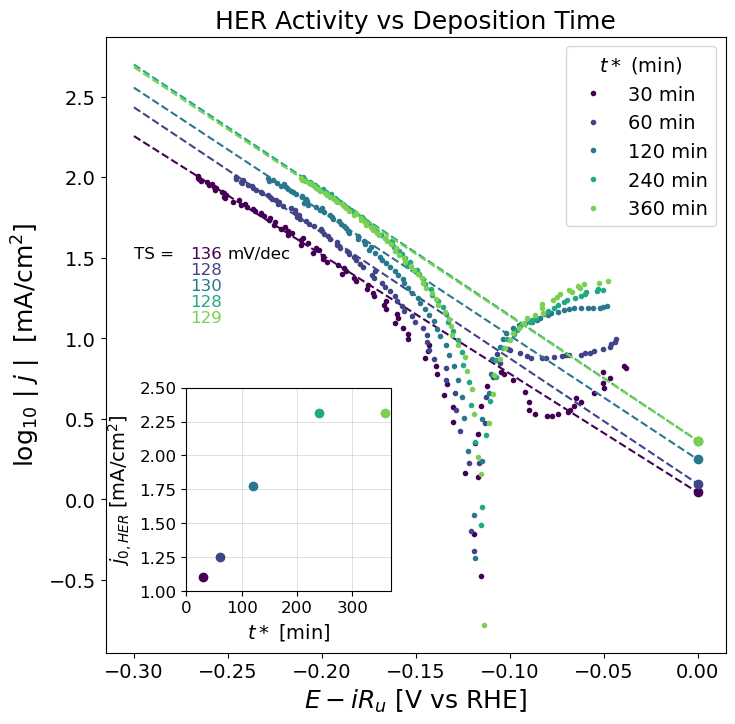

In [15]:
# Comparison of LSVs from all depositions

RHE = 0.917    # V vs Hg/HgO
A = 2          # cm^2
E_cut = -0.18 # V vs Hg/HgO

# Create array of colors from viridis colormap
n_datasets = 5
v_colors = [plt.get_cmap('viridis')(i / (n_datasets)) for i in range(n_datasets)]

fig, ax2 = plt.subplots(figsize=(8,8))

### Place and plot the inset
inset_ax = ax2.inset_axes([0.13, 0.1, 0.33, 0.33], xlim=(0, 370), ylim=(1.0, 2.5))

inset_ax.set_xlabel(r'$t*$ [min]', size = 14)
inset_ax.set_ylabel(r'${{j_{0,HER}}}$ ${\mathrm{[mA/cm^2]}}$', size = 14)
inset_ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)
inset_ax.tick_params(axis='both', which='major', labelsize=12)

## Data
times = np.array([30, 60, 120, 240, 360])
i0s = np.array([2.71, 3.59, 4.64, 6.12, 6.34])
j0s = i0s/2


##### 30 min #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_30 = pd.read_csv('TS-82-25-02-30-100_2024-07-23_clean_NaOH_04_LSV_C01.txt', sep='\t')
LSV_red_NaOH_30['Ecorr'] = LSV_red_NaOH_30.loc[:, 'Ewe/V']-(LSV_red_NaOH_30.loc[:, '<I>/mA']/1000*(0.5)-RHE)

## Separate the cycles by checking if the time between last measurement is greater than 10 s
LSV_red_NaOH_30['dT'] = LSV_red_NaOH_30['time/s'].diff()
LSV_red_NaOH_30['cycle number'] = 0
l = LSV_red_NaOH_30.shape[0]
num = 0
for x in range(0,l):
    if LSV_red_NaOH_30.iloc[x, 15] < 1:
        LSV_red_NaOH_30.iloc[x, 16] = num
    if LSV_red_NaOH_30.iloc[x, 15] > 10:
        num = num + 1
LSV_red_NaOH_30 = LSV_red_NaOH_30[(LSV_red_NaOH_30['cycle number']==1)]  

##plot the data
ax2.plot(LSV_red_NaOH_30['Ecorr'], np.log10(np.abs(LSV_red_NaOH_30['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[0], label='30 min')


## Tafel for 30 min
Taf_30 = LSV_red_NaOH_30[(LSV_red_NaOH_30['Ecorr']<E_cut)]
m_30, b_30 = np.polyfit(Taf_30['Ecorr'], np.log10(np.abs(Taf_30['<I>/mA'])/A), 1)
xfit_30 = np.linspace(-0.3, 0.0, 100)
yfit_30 = m_30*xfit_30 + b_30

ax2.plot(xfit_30, yfit_30, linestyle='dashed', c=v_colors[0])
ax2.plot(0, b_30, marker='o', c=v_colors[0])


TS_30 = f'{(-1000/m_30):0.0f}'
ax2.text(-0.27, 1.5, TS_30, size='12', c=v_colors[0])


j0_30 = 10**(b_30)
inset_ax.plot(30, j0_30, marker='o', c=v_colors[0])



##### 60 min #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_60 = pd.read_csv('TS-82-25-02-60-100_2024-07-22_clean_NaOH_2_04_LSV_C01.txt', sep='\t')
LSV_red_NaOH_60['Ecorr'] = LSV_red_NaOH_60.loc[:, 'Ewe/V']-(LSV_red_NaOH_60.loc[:, '<I>/mA']/1000*(0.44)-RHE)

## Separate the cycles by checking if the time between last measurement is greater than 10 s
LSV_red_NaOH_60['dT'] = LSV_red_NaOH_60['time/s'].diff()
LSV_red_NaOH_60['cycle number'] = 0
l = LSV_red_NaOH_60.shape[0]
num = 0
for x in range(0,l):
    if LSV_red_NaOH_60.iloc[x, 15] < 1:
        LSV_red_NaOH_60.iloc[x, 16] = num
    if LSV_red_NaOH_60.iloc[x, 15] > 10:
        num = num + 1
LSV_red_NaOH_60 = LSV_red_NaOH_60[(LSV_red_NaOH_60['cycle number']==1)]  

##plot the data
ax2.plot(LSV_red_NaOH_60['Ecorr'], np.log10(np.abs(LSV_red_NaOH_60['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[1], label='60 min')


## Tafel for 60 min
Taf_60 = LSV_red_NaOH_60[(LSV_red_NaOH_60['Ecorr']<E_cut)]
m_60, b_60 = np.polyfit(Taf_60['Ecorr'], np.log10(np.abs(Taf_60['<I>/mA'])/A), 1)
xfit_60 = np.linspace(-0.3, 0.0, 100)
yfit_60 = m_60*xfit_60 + b_60

ax2.plot(xfit_60, yfit_60, linestyle='dashed', c=v_colors[1])
ax2.plot(0, b_60, marker='o', c=v_colors[1])

TS_60 = f'{(-1000/m_60):0.0f}'

ax2.text(-0.30, 1.5, 'TS =', size='12')
ax2.text(-0.27, 1.4, TS_60, size='12', c=v_colors[1])
ax2.text(-0.25, 1.5, 'mV/dec', size='12')

i0_60 = 10**(b_60)
i0_60 = f'{(-i0_60):0.2f}'

j0_60 = 10**(b_60)
inset_ax.plot(60, j0_60, marker='o', c=v_colors[1])

##### 120 min #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_120 = pd.read_csv('TS-82-25-02-120-100_2024-07-29_clean_NaOH_04_LSV_C01.txt', sep='\t')
LSV_red_NaOH_120['Ecorr'] = LSV_red_NaOH_120.loc[:, 'Ewe/V']-(LSV_red_NaOH_120.loc[:, '<I>/mA']/1000*(0.49)-RHE)

## Separate the cycles by checking if the time between last measurement is greater than 10 s
LSV_red_NaOH_120['dT'] = LSV_red_NaOH_120['time/s'].diff()
LSV_red_NaOH_120['cycle number'] = 0
l = LSV_red_NaOH_120.shape[0]
num = 0
for x in range(0,l):
    if LSV_red_NaOH_120.iloc[x, 15] < 1:
        LSV_red_NaOH_120.iloc[x, 16] = num
    if LSV_red_NaOH_120.iloc[x, 15] > 10:
        num = num + 1
LSV_red_NaOH_120 = LSV_red_NaOH_120[(LSV_red_NaOH_120['cycle number']==1)]  

##plot the data
ax2.plot(LSV_red_NaOH_120['Ecorr'], np.log10(np.abs(LSV_red_NaOH_120['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[2], label='120 min')


## Tafel for 60 min
Taf_120 = LSV_red_NaOH_120[(LSV_red_NaOH_120['Ecorr']<E_cut)]
m_120, b_120 = np.polyfit(Taf_120['Ecorr'], np.log10(np.abs(Taf_120['<I>/mA'])/A), 1)
xfit_120 = np.linspace(-0.3, 0.0, 100)
yfit_120 = m_120*xfit_120 + b_120

ax2.plot(xfit_120, yfit_120, linestyle='dashed', c=v_colors[2])
ax2.plot(0, b_120, marker='o', c=v_colors[2])

TS_120 = f'{(-1000/m_120):0.0f}'
ax2.text(-0.27, 1.3, TS_120, size='12', c=v_colors[2])

i0_120 = 10**(b_120)
i0_120 = f'{(-i0_120):0.2f}'

j0_120 = 10**(b_120)
inset_ax.plot(120, j0_120, marker='o', c=v_colors[2])


##### 240 min #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_240 = pd.read_csv('TS-82-25-02-240-100_2024-07-25_clean_NaOH_04_LSV_C01.txt', sep='\t')
LSV_red_NaOH_240['Ecorr'] = LSV_red_NaOH_240.loc[:, 'Ewe/V']-(LSV_red_NaOH_240.loc[:, '<I>/mA']/1000*(0.45)-RHE)

## Separate the cycles by checking if the time between last measurement is greater than 10 s
LSV_red_NaOH_240['dT'] = LSV_red_NaOH_240['time/s'].diff()
LSV_red_NaOH_240['cycle number'] = 0
l = LSV_red_NaOH_240.shape[0]
num = 0
for x in range(0,l):
    if LSV_red_NaOH_240.iloc[x, 15] < 1:
        LSV_red_NaOH_240.iloc[x, 16] = num
    if LSV_red_NaOH_240.iloc[x, 15] > 10:
        num = num + 1
LSV_red_NaOH_240 = LSV_red_NaOH_240[(LSV_red_NaOH_240['cycle number']==1)]  

##plot the data
ax2.plot(LSV_red_NaOH_240['Ecorr'], np.log10(np.abs(LSV_red_NaOH_240['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[3], label='240 min')


## Tafel for 240 min
Taf_240 = LSV_red_NaOH_240[(LSV_red_NaOH_240['Ecorr']<E_cut)]
m_240, b_240 = np.polyfit(Taf_240['Ecorr'], np.log10(np.abs(Taf_240['<I>/mA'])/A), 1)
xfit_240 = np.linspace(-0.3, 0.0, 100)
yfit_240 = m_240*xfit_240 + b_240

ax2.plot(xfit_240, yfit_240, linestyle='dashed', c=v_colors[3])
ax2.plot(0, b_240, marker='o', c=v_colors[3])

TS_240 = f'{(-1000/m_240):0.0f}'
ax2.text(-0.27, 1.2, TS_240, size='12', c=v_colors[3])
i0_240 = 10**(b_240)
i0_240 = f'{(-i0_240):0.2f}'
ax2.text(-0.27, 0.5, i0_240, size='12', c=v_colors[3])

j0_240 = 10**(b_240)
inset_ax.plot(240, j0_240, marker='o', c=v_colors[3])


##### 360 min #####
##generate the dataframe and perform iR correction
LSV_red_NaOH_360 = pd.read_csv('TS-82-25-02-360-100_2024-07-30_clean_NaOH_04_LSV_C01.txt', sep='\t')
LSV_red_NaOH_360['Ecorr'] = LSV_red_NaOH_360.loc[:, 'Ewe/V']-(LSV_red_NaOH_360.loc[:, '<I>/mA']/1000*(0.46)-RHE)

## Separate the cycles by checking if the time between last measurement is greater than 10 s
LSV_red_NaOH_360['dT'] = LSV_red_NaOH_360['time/s'].diff()
LSV_red_NaOH_360['cycle number'] = 0
l = LSV_red_NaOH_360.shape[0]
num = 0
for x in range(0,l):
    if LSV_red_NaOH_360.iloc[x, 15] < 1:
        LSV_red_NaOH_360.iloc[x, 16] = num
    if LSV_red_NaOH_360.iloc[x, 15] > 10:
        num = num + 1
LSV_red_NaOH_360 = LSV_red_NaOH_360[(LSV_red_NaOH_360['cycle number']==1)]  

##plot the data
ax2.plot(LSV_red_NaOH_360['Ecorr'], np.log10(np.abs(LSV_red_NaOH_360['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[4], label='360 min')


## Tafel for 360 min
Taf_360 = LSV_red_NaOH_360[(LSV_red_NaOH_360['Ecorr']<E_cut)]
m_360, b_360 = np.polyfit(Taf_360['Ecorr'], np.log10(np.abs(Taf_360['<I>/mA'])/A), 1)
xfit_360 = np.linspace(-0.3, 0.0, 100)
yfit_360 = m_360*xfit_360 + b_360

ax2.plot(xfit_360, yfit_360, linestyle='dashed', c=v_colors[4])
ax2.plot(0, b_360, marker='o', c=v_colors[4])

TS_360 = f'{(-1000/m_360):0.0f}'
ax2.text(-0.27, 1.1, TS_360, size='12', c=v_colors[4])


i0_360 = 10**(b_360)
i0_360 = f'{(-i0_360):0.2f}'
j0_360 = 10**(b_360)
inset_ax.plot(360, j0_360, marker='o', c=v_colors[4])


#### labels
ax2.set_xlabel('$E-iR_u$ [V vs RHE]', size='18')
ax2.set_ylabel(r'${\mathrm{log_{10}}}$ | $j$ |  ${\mathrm{[mA/cm^2]}}$', size='18')
ax2.legend(fontsize='14', title='$t*$ (min)', title_fontsize='14')
ax2.tick_params(axis='both', which='major', labelsize=14)

#### titles
ax2.set_title('HER Activity vs Deposition Time', size='18')

fig.savefig('j0_HER_vs_t_Tafel.png', bbox_inches='tight', dpi=500)

In [3]:
print(j0_30)
print(j0_60)
print(j0_120)
print(j0_240)
print(j0_360)

1.1053569094304083
1.2495001179976597
1.7708195300653642
2.3134526295964646
2.3128613314446174


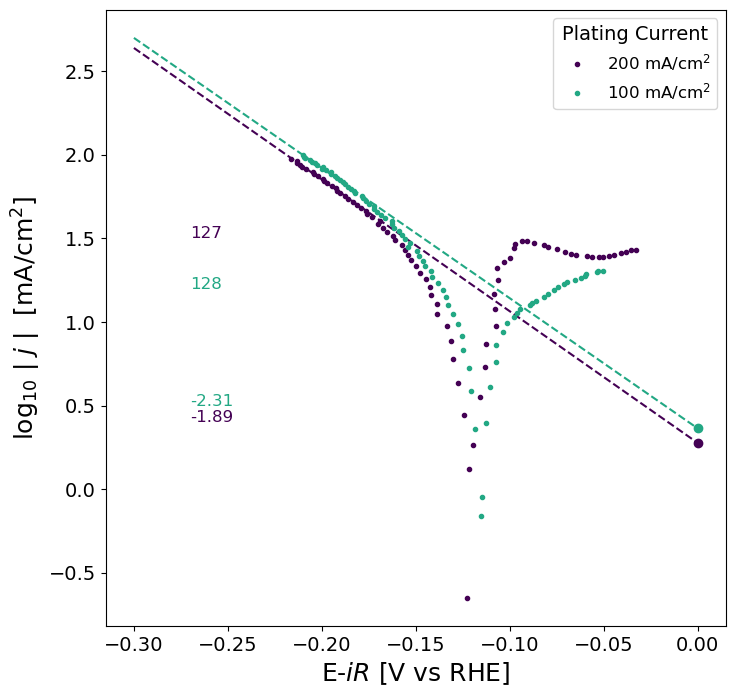

In [3]:
# Comparison of LSVs from all depositions
A = 2          # cm^2

# Create array of colors from viridis colormap
n_datasets = 5
v_colors = [plt.get_cmap('viridis')(i / (n_datasets)) for i in range(n_datasets)]

# Initialize the figure
fig, ax2 = plt.subplots(figsize=(8,8))




##### 200 mA/cm2  Growth Current #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_200 = pd.read_csv(
    '2h_200mAcm2_cleanNaOH _j100_scanRate_2025-10-28_12_LSV_C01_noheader.txt', sep='\t')
LSV_red_NaOH_200['Ecorr'] = LSV_red_NaOH_200.loc[:, 'Ewe/V']-(LSV_red_NaOH_200.loc[:, '<I>/mA']/1000*(0.33)-0.934)
LSV_red_NaOH_200.drop(LSV_red_NaOH_200.head(15).index,inplace=True) # drop first n rows


##plot the data
ax2.plot(LSV_red_NaOH_200['Ecorr'], np.log10(np.abs(LSV_red_NaOH_200['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[0], label='200 ${\mathrm{mA/cm^2}}$')
#ax2.plot(LSV_red_NaOH_200['Ecorr'], (LSV_red_NaOH_200['<I>/mA'])/A, marker='.', linestyle='none', c=v_colors[0], label='200 mA/cm2')


## Tafel for 200 mA/cm2
Taf_200 = LSV_red_NaOH_200[(LSV_red_NaOH_200['Ecorr']<-0.18)]
m_200, b_200 = np.polyfit(Taf_200['Ecorr'], np.log10(np.abs(Taf_200['<I>/mA'])/A), 1)
xfit_200 = np.linspace(-0.3, 0.0, 100)
yfit_200 = m_200*xfit_200 + b_200

ax2.plot(xfit_200, yfit_200, linestyle='dashed', c=v_colors[0])
ax2.plot(0, b_200, marker='o', c=v_colors[0])


TS_200 = f'{(-1000/m_200):0.0f}'
ax2.text(-0.27, 1.5, TS_200, size='12', c=v_colors[0])
i0_200 = 10**(b_200)
i0_200 = f'{(-i0_200):0.2f}'
ax2.text(-0.27, 0.4, i0_200, size='12', c=v_colors[0])

j0_200 = 10**(b_200)
#inset_ax.plot(200, j0_200, marker='o', c=v_colors[0])




##### 100 mA/cm2 Growth current #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_100 = pd.read_csv('TS-82-25-02-240-100_2024-07-25_clean_NaOH_04_LSV_C01.txt', sep='\t')
LSV_red_NaOH_100['Ecorr'] = LSV_red_NaOH_100.loc[:, 'Ewe/V']-(LSV_red_NaOH_100.loc[:, '<I>/mA']/1000*(0.45)-0.917)

## Separate the cycles by checking if the time between last measurement is greater than 10 s
LSV_red_NaOH_100['dT'] = LSV_red_NaOH_100['time/s'].diff()
LSV_red_NaOH_100['cycle number'] = 0
l = LSV_red_NaOH_100.shape[0]
num = 0
for x in range(0,l):
    if LSV_red_NaOH_100.iloc[x, 15] < 1:
        LSV_red_NaOH_100.iloc[x, 16] = num
    if LSV_red_NaOH_100.iloc[x, 15] > 10:
        num = num + 1
LSV_red_NaOH_100 = LSV_red_NaOH_100[(LSV_red_NaOH_100['cycle number']==1)]  

##plot the data
ax2.plot(LSV_red_NaOH_100['Ecorr'], np.log10(np.abs(LSV_red_NaOH_100['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[3], label='100 ${\mathrm{mA/cm^2}}$')
#ax2.plot(LSV_red_NaOH_100['Ecorr'], (LSV_red_NaOH_100['<I>/mA'])/A, marker='.', linestyle='none', c=v_colors[3], label='100 mA/cm2')


## Tafel for 100 mA/cm2
Taf_100 = LSV_red_NaOH_100[(LSV_red_NaOH_100['Ecorr']<-0.18)]
m_100, b_100 = np.polyfit(Taf_100['Ecorr'], np.log10(np.abs(Taf_100['<I>/mA'])/A), 1)
xfit_100 = np.linspace(-0.3, 0.0, 100)
yfit_100 = m_100*xfit_100 + b_100

ax2.plot(xfit_100, yfit_100, linestyle='dashed', c=v_colors[3])
ax2.plot(0, b_100, marker='o', c=v_colors[3])

TS_100 = f'{(-1000/m_100):0.0f}'
ax2.text(-0.27, 1.2, TS_100, size='12', c=v_colors[3])
i0_100 = 10**(b_100)
i0_100 = f'{(-i0_100):0.2f}'
ax2.text(-0.27, 0.5, i0_100, size='12', c=v_colors[3])

j0_240 = 10**(b_100)
#inset_ax.plot(100, j0_240, marker='o', c=v_colors[3])




#### labels
ax2.set_xlabel('E-$iR$ [V vs RHE]', size='18')
ax2.set_ylabel(r'${\mathrm{log_{10}}}$ | $j$ |  ${\mathrm{[mA/cm^2]}}$', size='18')
ax2.legend(fontsize='12', title='Plating Current', title_fontsize='14')
ax2.tick_params(axis='both', which='major', labelsize=14)

#### titles
#ax2.set_title('HER Activity vs Deposition Time', size='18')

fig.savefig('HER_Tafel_100vs200_mAcm2_growth.png', bbox_inches='tight', dpi=500)

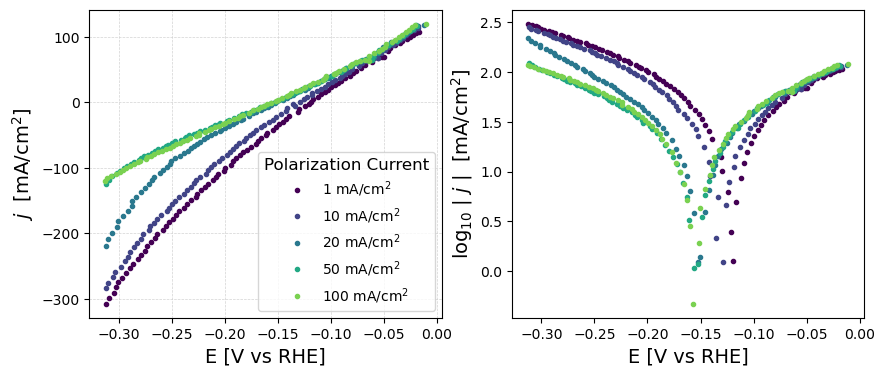

In [6]:
# Comparison of LSVs from all depositions

Ru = 0.0
RHE = 0.933    # V vs Hg/HgO
A = 2          # cm^2

# Create array of colors from viridis colormap
n_datasets = 5
v_colors = [plt.get_cmap('viridis')(i / (n_datasets)) for i in range(n_datasets)]

# Initialize plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))



##### 1 mA/cm2 #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_1 = pd.read_csv(
    '2h_200mAcm2_cleanNaOH_all _j_2025-10-28b_12_LSV_C01_noheader.txt', sep='\t')
LSV_red_NaOH_1['Ecorr'] = LSV_red_NaOH_1.loc[:, 'Ewe/V']-(LSV_red_NaOH_1.loc[:, '<I>/mA']/1000*(Ru)-RHE)
LSV_red_NaOH_1.drop(LSV_red_NaOH_1.head(5).index,inplace=True) # drop first n rows

##plot the data
ax1.plot(LSV_red_NaOH_1['Ecorr'], (LSV_red_NaOH_1['<I>/mA'])/A, marker='.', linestyle='none', c=v_colors[0], label='1 ${\mathrm{mA/cm^2}}$')
ax2.plot(LSV_red_NaOH_1['Ecorr'], np.log10(np.abs(LSV_red_NaOH_1['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[0], label='1 mA/cm2')




##### 10 mA/cm2 #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_10 = pd.read_csv(
    '2h_200mAcm2_cleanNaOH_all _j_2025-10-28b_08_LSV_C01_noheader.txt', sep='\t')
LSV_red_NaOH_10['Ecorr'] = LSV_red_NaOH_10.loc[:, 'Ewe/V']-(LSV_red_NaOH_10.loc[:, '<I>/mA']/1000*(Ru)-RHE)
LSV_red_NaOH_10.drop(LSV_red_NaOH_10.head(5).index,inplace=True) # drop first n rows

##plot the data
ax1.plot(LSV_red_NaOH_10['Ecorr'], (LSV_red_NaOH_10['<I>/mA'])/A, marker='.', linestyle='none', c=v_colors[1], label='10 ${\mathrm{mA/cm^2}}$')
ax2.plot(LSV_red_NaOH_10['Ecorr'], np.log10(np.abs(LSV_red_NaOH_10['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[1], label='10 mA/cm2')




##### 20 mA/cm2 #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_20 = pd.read_csv(
    '2h_200mAcm2_cleanNaOH _j_100-20mAcm2_2025-10-28_12_LSV_C01_noheader.txt', sep='\t')
LSV_red_NaOH_20['Ecorr'] = LSV_red_NaOH_20.loc[:, 'Ewe/V']-(LSV_red_NaOH_20.loc[:, '<I>/mA']/1000*(Ru)-RHE)
LSV_red_NaOH_20.drop(LSV_red_NaOH_20.head(5).index,inplace=True) # drop first n rows

##plot the data
ax1.plot(LSV_red_NaOH_20['Ecorr'], (LSV_red_NaOH_20['<I>/mA'])/A, marker='.', linestyle='none', c=v_colors[2], label='20 ${\mathrm{mA/cm^2}}$')
ax2.plot(LSV_red_NaOH_20['Ecorr'], np.log10(np.abs(LSV_red_NaOH_20['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[2], label='20 mA/cm2')



##### 50 mA/cm2 #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_50 = pd.read_csv(
    '2h_200mAcm2_cleanNaOH _j_100-20mAcm2_2025-10-28_08_LSV_C01_noheader.txt', sep='\t')
LSV_red_NaOH_50['Ecorr'] = LSV_red_NaOH_50.loc[:, 'Ewe/V']-(LSV_red_NaOH_50.loc[:, '<I>/mA']/1000*(Ru)-RHE)
LSV_red_NaOH_50.drop(LSV_red_NaOH_50.head(5).index,inplace=True) # drop first n rows

##plot the data
ax1.plot(LSV_red_NaOH_50['Ecorr'], (LSV_red_NaOH_50['<I>/mA'])/A, marker='.', linestyle='none', c=v_colors[3], label='50 ${\mathrm{mA/cm^2}}$')
ax2.plot(LSV_red_NaOH_50['Ecorr'], np.log10(np.abs(LSV_red_NaOH_50['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[3], label='50 mA/cm2')




##### 100 mA/cm2 #####
#generate the dataframe and perform iR correction
LSV_red_NaOH_100 = pd.read_csv(
    '2h_200mAcm2_cleanNaOH _j_100-20mAcm2_2025-10-28_04_LSV_C01_noheader.txt', sep='\t')
LSV_red_NaOH_100['Ecorr'] = LSV_red_NaOH_100.loc[:, 'Ewe/V']-(LSV_red_NaOH_100.loc[:, '<I>/mA']/1000*(Ru)-RHE)
LSV_red_NaOH_100.drop(LSV_red_NaOH_100.head(5).index,inplace=True) # drop first n rows

##plot the data
ax1.plot(LSV_red_NaOH_100['Ecorr'], (LSV_red_NaOH_100['<I>/mA'])/A, marker='.', linestyle='none', c=v_colors[4], label='100 ${\mathrm{mA/cm^2}}$')
ax2.plot(LSV_red_NaOH_100['Ecorr'], np.log10(np.abs(LSV_red_NaOH_100['<I>/mA'])/A), marker='.', linestyle='none', c=v_colors[4], label='100 mA/cm2')





#### labels
ax1.set_xlabel('E [V vs RHE]', size='14')
ax1.set_ylabel(r'$j$  ${\mathrm{[mA/cm^2]}}$', size='14')
ax1.legend(fontsize='10', title='Polarization Current', title_fontsize='12', loc='lower right')
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.grid(color='lightgrey', linestyle='--', linewidth=0.5)

ax2.set_xlabel('E [V vs RHE]', size='14')
ax2.set_ylabel(r'${\mathrm{log_{10}}}$ | $j$ |  ${\mathrm{[mA/cm^2]}}$', size='14')
#ax2.legend(fontsize='8', title='Polarization Current', title_fontsize='10')
ax2.tick_params(axis='both', which='major', labelsize=10)

#### titles
#ax2.set_title('HER Activity vs Polarization Current', size='18')

fig.savefig('HER_vs_pol_Current.png', bbox_inches='tight', dpi=500)

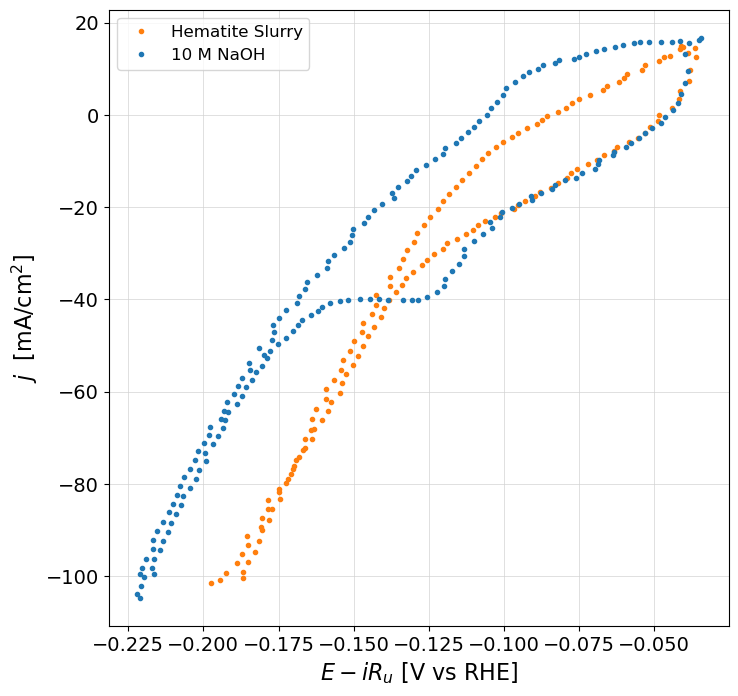

In [14]:
### Plot CVs in slurry and in clean 10M NaOH for film t* = 120 min 

fig, ax = plt.subplots(figsize=(8,8))


# LSVs in slurry 
LSV_ox_slurry_120 = pd.read_csv('TS-82-25-02-120-100_2024-07-29_hematite_slurry_06_LSV_C01.txt', sep='\t')
LSV_ox_slurry_120['Ecorr'] = LSV_ox_slurry_120.loc[:, 'Ewe/V']-(LSV_ox_slurry_120.loc[:, '<I>/mA']/1000*(0.4)-0.926)
LSV_ox_slurry_120['j'] = LSV_ox_slurry_120['<I>/mA']/2
LSV_red_slurry_120 = pd.read_csv('TS-82-25-02-120-100_2024-07-29_hematite_slurry_05_LSV_C01.txt', sep='\t')
LSV_red_slurry_120['Ecorr'] = LSV_red_slurry_120.loc[:, 'Ewe/V']-(LSV_red_slurry_120.loc[:, '<I>/mA']/1000*(0.4)-0.926)
LSV_red_slurry_120['j'] = LSV_red_slurry_120['<I>/mA']/2


# LSVs in NaOH 
LSV_ox_NaOH_120 = pd.read_csv('TS-82-25-02-120-100_2024-07-29_clean_NaOH_05_LSV_C01.txt', sep='\t')
LSV_ox_NaOH_120['Ecorr'] = LSV_ox_NaOH_120.loc[:, 'Ewe/V']-(LSV_ox_NaOH_120.loc[:, '<I>/mA']/1000*(0.49)-0.926)
#LSV_ox_NaOH_120['j'] = LSV_ox_NaOH_120['<I>/mA']/2
LSV_red_NaOH_120 = pd.read_csv('TS-82-25-02-120-100_2024-07-29_clean_NaOH_04_LSV_C01.txt', sep='\t')
LSV_red_NaOH_120['Ecorr'] = LSV_red_NaOH_120.loc[:, 'Ewe/V']-(LSV_red_NaOH_120.loc[:, '<I>/mA']/1000*(0.49)-0.926)
#LSV_red_NaOH_120['j'] = LSV_red_NaOH_120['<I>/mA']/2


# Separate the cycles by checking if the time between last measurement is greater than 10 s
LSV_ox_NaOH_120['dT'] = LSV_ox_NaOH_120['time/s'].diff()
LSV_ox_NaOH_120['cycle number'] = 0
l = LSV_ox_NaOH_120.shape[0]
num = 0
for x in range(0,l):
    if LSV_ox_NaOH_120.iloc[x, 15] < 1:
        LSV_ox_NaOH_120.iloc[x, 16] = num
    if LSV_ox_NaOH_120.iloc[x, 15] > 10:
        num = num + 1
        
# Separate the cycles by checking if the time between last measurement is greater than 10 s
LSV_red_NaOH_120['dT'] = LSV_red_NaOH_120['time/s'].diff()
LSV_red_NaOH_120['cycle number'] = 0
l = LSV_red_NaOH_120.shape[0]
num = 0
for x in range(0,l):
    if LSV_red_NaOH_120.iloc[x, 15] < 1:
        LSV_red_NaOH_120.iloc[x, 16] = num
    if LSV_red_NaOH_120.iloc[x, 15] > 10:
        num = num + 1

LSV_ox_NaOH_120_1 = LSV_ox_NaOH_120[(LSV_ox_NaOH_120['cycle number']==0)]
LSV_ox_NaOH_120_2 = LSV_ox_NaOH_120[(LSV_ox_NaOH_120['cycle number']==1)]
LSV_ox_NaOH_120_3 = LSV_ox_NaOH_120[(LSV_ox_NaOH_120['cycle number']==2)]
LSV_ox_NaOH_120_4 = LSV_ox_NaOH_120[(LSV_ox_NaOH_120['cycle number']==3)]
LSV_ox_NaOH_120_5 = LSV_ox_NaOH_120[(LSV_ox_NaOH_120['cycle number']==4)]

LSV_red_NaOH_120_1 = LSV_red_NaOH_120[(LSV_red_NaOH_120['cycle number']==0)]
LSV_red_NaOH_120_2 = LSV_red_NaOH_120[(LSV_red_NaOH_120['cycle number']==1)]
LSV_red_NaOH_120_3 = LSV_red_NaOH_120[(LSV_red_NaOH_120['cycle number']==2)]
LSV_red_NaOH_120_4 = LSV_red_NaOH_120[(LSV_red_NaOH_120['cycle number']==3)]
LSV_red_NaOH_120_5 = LSV_red_NaOH_120[(LSV_red_NaOH_120['cycle number']==4)]

ax.plot(LSV_ox_slurry_120['Ecorr'], LSV_ox_slurry_120['j'], marker='.', linestyle='none', c='C1', label='Hematite Slurry')
ax.plot(LSV_red_slurry_120['Ecorr'], LSV_red_slurry_120['j'], marker='.', linestyle='none', c='C1')

ax.plot(LSV_ox_NaOH_120_1['Ecorr'], LSV_ox_NaOH_120_1['<I>/mA']/2, marker='.', linestyle='none', c='C0', label='10 M NaOH')
ax.plot(LSV_red_NaOH_120_1['Ecorr'], LSV_red_NaOH_120_1['<I>/mA']/2, marker='.', linestyle='none', c='C0')




#labels
ax.set_xlabel('$E-iR_u$ [V vs RHE]', size='16')
ax.set_ylabel(r'$j$  ${\mathrm{[mA/cm^2]}}$', size='16')
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)
ax.legend(fontsize='12')
ax.tick_params(axis='both', which='major', labelsize=14)



fig.savefig('CV_slurry_vs_NaOH.png', bbox_inches='tight', dpi=500)



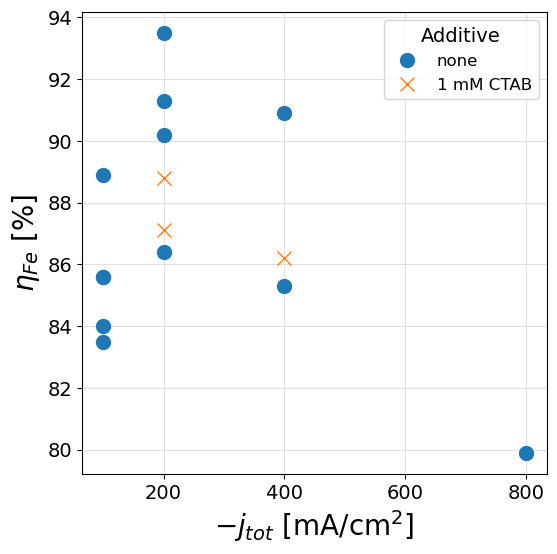

In [101]:
# Plot Faradaic efficiency for all current densities w/ and w/o CTAB

## Data for different current densities at 400 mA*hr total charge, including non-flow for 100 mA/cm2
dj = {'j': [100, 100, 100, 100, 100, 200, 200, 200, 200, 400, 400, 800], 'FE': [88.9, 85.6, 85.6, 83.5, 84.0, 90.2, 93.5, 91.3, 86.4, 90.9, 85.3, 79.9]}  # time in minutes, FE in %
dfj = pd.DataFrame(dj)
## Data for different current densities at 400 mA*hr total charge, with CTAB
dj_CTAB = {'j': [200, 200, 400], 'FE': [87.1, 88.8, 86.2]}  # time in minutes, FE in %
dfj_CTAB = pd.DataFrame(dj_CTAB)

fig, ax = plt.subplots(figsize=(6,6))

ax.plot(dfj['j'], dfj['FE'], marker = 'o', markersize='10', linestyle='none', label=r'none')
ax.plot(dfj_CTAB['j'], dfj_CTAB['FE'], marker = 'x', markersize='10', linestyle='none', label=r'1 mM CTAB')


ax.set_xlabel('$-j_{tot}$ ${\mathrm{[mA/cm^2]}}$', size=20)
ax.set_ylabel('$\eta_{Fe}$ [%]', size=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=12)
ax.legend(fontsize='12', title='Additive', title_fontsize='14')
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)


fig.savefig('Fe_vs_j_w_wo_CTAB.png', bbox_inches='tight', dpi=500)

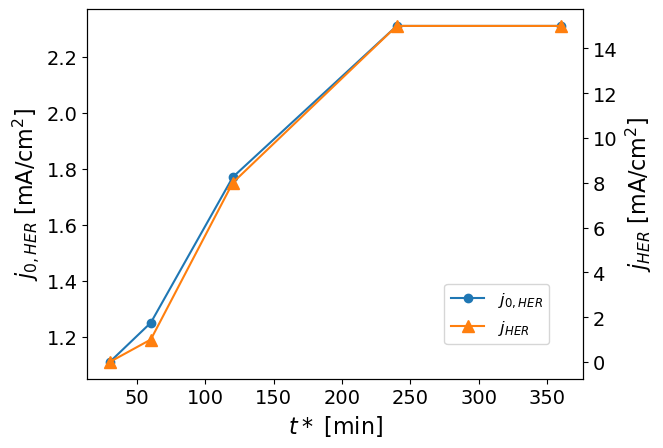

In [10]:
#### Plot A_eff vs t* with twin axis j_HER vs t*

# Define constants
alpha = 0.5      # Transfer coefficient
n = 2            # number of electrons
F = 96485        # Faraday's constant (C/mol)
R = 8.314        # Gas constant (J/mol·K)
T = 355          # Temperature (K)
f = (n*F)/(R*T)  # ~38.94 V⁻¹ at 298 K
j_tot = 100      # Total current (mA/cm2)
A_geo = 2        # Geometric Area (cm2)

# Create the DataFrame
data = {
    't*': [30, 60, 120, 240, 360],                      # electrolysis duration (min)
    'L': [60e-4, 120e-4, 240e-4, 480e-4, 720e-4],       # film thickness (cm)
    #'j0app_HER': [1.22, 1.42, 2.26, 3.06, 2.63],        # apparent exchange current density (mA/cm2)
    'j0app_HER': [1.11, 1.25, 1.77, 2.31, 2.31],        # apparent exchange current density (mA/cm2)
    'eta_Fe': [1.00, 0.99, 0.92, 0.85, 0.85],           # Faradaic efficiency towards iron palting (0-1) from averages of real data
    #'eta_Fe_fit': [0.9941, 0.894, 0.841, 0.800, 0.796], # Faradaic efficiency towards iron palting (0-1) from current efficiency fit
    'overpot_HER': [0.3, 0.26, 0.22, 0.18, 0.18]        # HER overpotential, from CP trace (V)
}
df2 = pd.DataFrame(data)

# add additional values
df2['j_tot'] = j_tot  # mA/cm²
df2['A_geo'] = A_geo   # cm²
df2['j_HER'] = df2['j_tot'] * (1 - df2['eta_Fe'])
#df2['j_HER_fit'] = df2['j_tot'] * (1 - df2['eta_Fe_fit'])
df2['A_rel'] = df2['j0app_HER'] / 0.0857




# Calculate a_int using vectorized operations

df2['a_int'] = df2['j_HER'] / (df2['A_geo'] * df2['L'] * df2['j0app_HER'] * np.exp(-alpha * f * df2['overpot_HER']))

fig, ax = plt.subplots()

ax.plot((df2['t*']), df2['j0app_HER'], c='C0', marker='o', label='$j_{0,HER}$')
ax2 = ax.twinx()
ax2.plot(df2['t*'], df2['j_HER'], c='C1', marker='^', markersize='8', label='$j_{HER}$')
#ax2.plot(df2['t*'], df2['j_HER_fit'], c='C2', marker='^', markersize='8', label='$j_{HER}$')

ax.set_ylabel('$j_{0,HER}$ ${\mathrm{[mA/cm^2]}}$', size=16)
ax2.set_ylabel('$j_{HER}$ ${\mathrm{[mA/cm^2]}}$', size=16)
ax.set_xlabel('$t*$ [min]', size=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
#ax.set_ylim(1.2, 3.75)

fig.legend(loc='lower right', bbox_to_anchor=(0.86, 0.165), fontsize=12)

fig.savefig('j0_HER vs j_HER_FE.png', bbox_inches='tight', dpi=500)

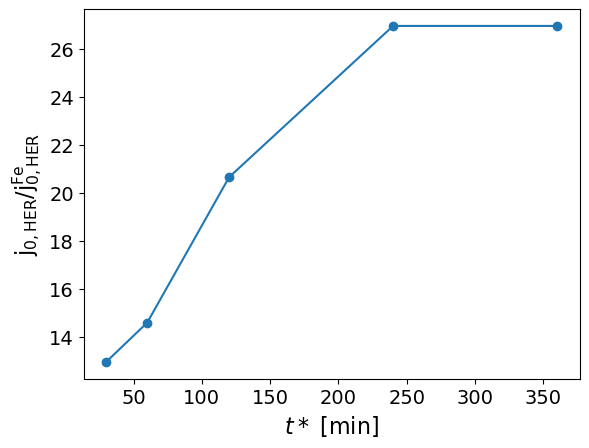

In [5]:
#### Plot A_eff vs t* with twin axis j_HER vs t*

# Define constants
alpha = 0.5      # Transfer coefficient
n = 2            # number of electrons
F = 96485        # Faraday's constant (C/mol)
R = 8.314        # Gas constant (J/mol·K)
T = 355          # Temperature (K)
f = (n*F)/(R*T)  # ~38.94 V⁻¹ at 298 K
j_tot = 100      # Total current (mA/cm2)
A_geo = 2        # Geometric Area (cm2)

# Create the DataFrame
data = {
    't*': [30, 60, 120, 240, 360],                      # electrolysis duration (min)
    'L': [60e-4, 120e-4, 240e-4, 480e-4, 720e-4],       # film thickness (cm)
    'j0app_HER': [1.11, 1.25, 1.77, 2.31, 2.31],        # apparent exchange current density (mA/cm2)
    'eta_Fe': [0.999, 0.98, 0.92, 0.85, 0.85],          # Faradaic efficiency towards iron palting (0-1)
    'overpot_HER': [0.3, 0.26, 0.22, 0.18, 0.18]        # HER overpotential, from CP trace (V)
}
df2 = pd.DataFrame(data)

# add additional values
df2['j_tot'] = j_tot  # mA/cm²
df2['A_geo'] = A_geo   # cm²
df2['j_HER'] = df2['j_tot'] * (1 - df2['eta_Fe'])
df2['A_rel'] = df2['j0app_HER'] / 0.0857


# Calculate a_int using vectorized operations

df2['a_int'] = df2['j_HER'] / (df2['A_geo'] * df2['L'] * df2['j0app_HER'] * np.exp(-alpha * f * df2['overpot_HER']))

fig, ax = plt.subplots()

ax.plot((df2['t*']), df2['A_rel'], c='C0', marker='o', label='$A_{rel}$')

ax.set_ylabel('${\mathrm{j_{0,HER}/j_{0,HER}^{Fe}}}$', size=16)
ax.set_xlabel('$t*$ [min]', size=16)
ax.tick_params(axis='both', which='major', labelsize=14)


fig.savefig('Roughness vs j_HER.png', bbox_inches='tight', dpi=500)

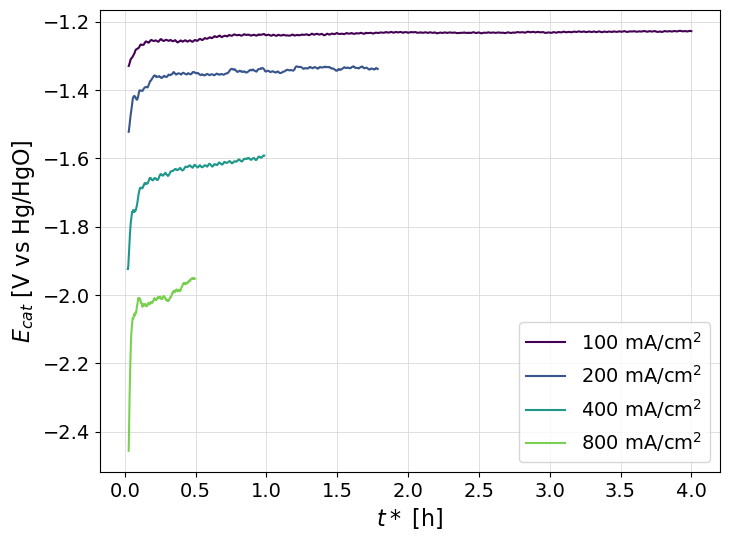

In [104]:
# CP

## Make an array containing all the file names
files = ['TS-82-25-06-240-100_2024-08-11_03_CP_C01.txt', 'TS-82-25-08-120-200_2024-08-22_C01.txt', 'TS-82-25-08-60-400c_2024-08-22_C01.txt', 'TS-82-25-08-30-800_2024-08-22_C01.txt']

## Make an array containing all the plot labels
labels = ['100 ${\mathrm{mA/cm^2}}$', '200 ${\mathrm{mA/cm^2}}$', '400 ${\mathrm{mA/cm^2}}$', '800 ${\mathrm{mA/cm^2}}$']
currents = [-0.4, -0.8, -1.6, -3.2]

# Define the coloring scheme using a perceptually uniform colormap
num_datasets = len(files)
# Create a truncated version of magma, excluding the lightest 20%
cmap_magma = plt.get_cmap('viridis')
colors = cmap_magma(np.linspace(0, 0.8, 256))  # Use only the first 80% of the colormap
cmap_truncated = mcolors.LinearSegmentedColormap.from_list('magma_truncated', colors)
colors = [cmap_truncated(i / (num_datasets - 1)) for i in range(num_datasets)]  # Evenly spaced colors

## Make an array for E_avg
E_avg = []

n = 0
## Initialize and format figure
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel(r'$t*$ [h]', size = 16)
ax.set_ylabel(r'$E_{cat}$ [V vs Hg/HgO]', size = 16)
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=14)

#### 100 mA/cm2 ####
df = pd.read_csv(files[n], sep='\t')
df.drop(df.tail(0).index,inplace=True) # drop last n rows
df.drop(df.head(0).index,inplace=True) # drop first n rows
### Adjust so all times start at 0
t0 = df.loc[0, 'time/s']
df.loc[:,'t0'] = df.loc[:, 'time/s'] - t0

### Smooth the potential data
df['E_smooth'] = df['<Ewe/V>'].rolling(window=200).mean()
### setup some local variables
x1 = df['t0']/3600
y1 = df['<Ewe/V>']
y2 = df['E_smooth']

### plot the data
ax.plot(x1, y2, marker='none', linestyle='solid', label=labels[n], c=colors[n])
n = n + 1

#### 200 mA/cm2 ####
df = pd.read_csv(files[n], sep='\t')
df.drop(df.tail(0).index,inplace=True) # drop last n rows
df.drop(df.head(1600).index,inplace=True) # drop first n rows
### Adjust so all times start at 0
t0 = df.loc[1600, 'time/s']
df.loc[:,'t0'] = df.loc[:, 'time/s'] - t0

### Smooth the potential data
df['E_smooth'] = df['<Ewe/V>'].rolling(window=200).mean()
### setup some local variables
x1 = df['t0']/3600
y1 = df['<Ewe/V>']
y2 = df['E_smooth']

### plot the data
ax.plot(x1, y2, marker='none', linestyle='solid', label=labels[n], c=colors[n])
n = n + 1

#### 400 mA/cm2 ####
df = pd.read_csv(files[n], sep='\t')
df.drop(df.tail(250).index,inplace=True) # drop last n rows
df.drop(df.head(250).index,inplace=True) # drop first n rows
### Adjust so all times start at 0
t0 = df.loc[300, 'time/s']
df.loc[:,'t0'] = df.loc[:, 'time/s'] - t0

### Smooth the potential data
df['E_smooth'] = df['<Ewe/V>'].rolling(window=200).mean()
### setup some local variables
x1 = df['t0']/3600
y1 = df['<Ewe/V>']
y2 = df['E_smooth']

### plot the data
ax.plot(x1, y2, marker='none', linestyle='solid', label=labels[n], c=colors[n])
n = n + 1

#### 800 mA/cm2 ####
df = pd.read_csv(files[n], sep='\t')
df.drop(df.tail(250).index,inplace=True) # drop last n rows
df.drop(df.head(1600).index,inplace=True) # drop first n rows
### Adjust so all times start at 0
t0 = df.loc[1600, 'time/s']
df.loc[:,'t0'] = df.loc[:, 'time/s'] - t0

### Smooth the potential data
df['E_smooth'] = df['<Ewe/V>'].rolling(window=200).mean()
### setup some local variables
x1 = df['t0']/3600
y1 = df['<Ewe/V>']
y2 = df['E_smooth']

### plot the data
ax.plot(x1, y2, marker='none', linestyle='solid', label=labels[n], c=colors[n])
n = n + 1

ax.legend(fontsize='14')

fig.savefig('Cathode_Potential_vs_t_all_j.png', bbox_inches='tight', dpi=500)


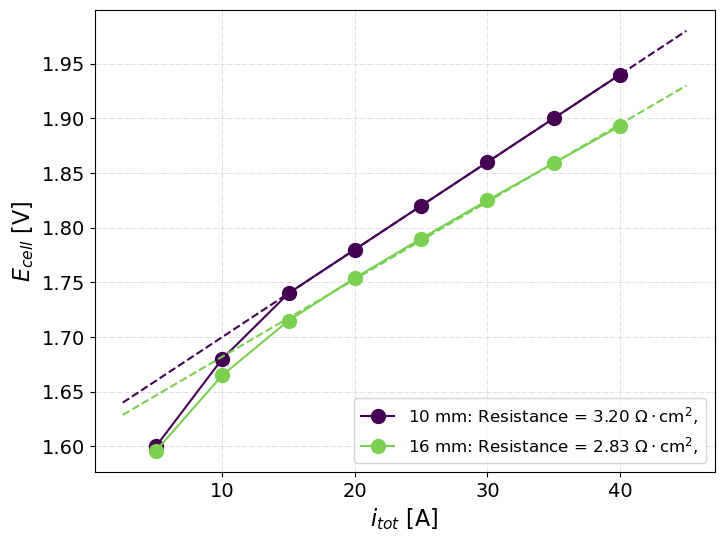

In [13]:
# Input the data
I = [5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]  # A
df_16mm_CTAB = pd.DataFrame({
    'I': I,
    'E': [1.659, 1.739, 1.800, 1.855, 1.908, 1.958, 2.007, 2.052],  # V
})

df_16mm_down = pd.DataFrame({
    'I': I,
    'E': [1.596, 1.665, 1.715, 1.754, 1.790, 1.825, 1.859, 1.893],  # V
})

#df_10mm_up = pd.DataFrame({
#    'I': I,
#    'E': [1.74, 1.82, 1.87, 1.91, 1.95, 1.98, 2.02, 2.05],  # V
#})

df_10mm_down = pd.DataFrame({
    'I': I,
    'E': [1.60, 1.68, 1.74, 1.78, 1.82, 1.86, 1.90, 1.94],  # V
})

dfs = [df_10mm_down, df_16mm_down]

# Labels for each dataset
labels = ['10 mm', '16 mm', '16 mm + CTAB']

# Define the coloring scheme using a perceptually uniform colormap
num_datasets = len(dfs)
# Create a truncated version of magma, excluding the lightest 20%
cmap_magma = plt.get_cmap('viridis')
colors = cmap_magma(np.linspace(0, 0.8, 256))  # Use only the first 80% of the colormap
cmap_truncated = mcolors.LinearSegmentedColormap.from_list('magma_truncated', colors)
colors = [cmap_truncated(i / (num_datasets - 1)) for i in range(num_datasets)]  # Evenly spaced colors
markers = ['o', 'o', 'o', 'o']

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel(r'$i_{tot}$ [A]', size=16)
ax.set_ylabel(r'$E_{cell}$ [V]', size=16)
ax.grid(color='lightgrey', linestyle='-.', linewidth=0.5)
ax.tick_params(axis='both', which='major', labelsize=14)

# Plot each dataset's polarization curve and fit
x_fit = np.linspace(2.5, 45, 100)  # For the fit line
legend_labels = []  # To store custom legend entries

for df_pol_curve, label, color, marker in zip(dfs, labels, colors, markers):
    # Plot the polarization curve with markers
    ax.plot(df_pol_curve['I'], df_pol_curve['E'], marker=marker, markersize = 10, color=color)

    # Fit for resistance (using subset where I > 10)
    df_fit2 = df_pol_curve[df_pol_curve['I'] > 10]
    m2, b2 = np.polyfit(df_fit2['I'], df_fit2['E'], 1)
    y_fit2 = m2 * x_fit + b2

    # Plot the fit line
    ax.plot(x_fit, y_fit2, linestyle='dashed', color=color)

    # Calculate resistance
    R_a = m2 * 400  # Resistance in ohm*cm^2
    R_f = f'{R_a:.2f}'

    # Calculate R^2
    y_pred = np.polyval([m2, b2], df_fit2['I'])
    ss_res = np.sum((df_fit2['E'] - y_pred) ** 2)
    ss_tot = np.sum((df_fit2['E'] - np.mean(df_fit2['E'])) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    R2 = f'{r_squared:.3f}'

    # Create legend entry with resistance and R^2
    #legend_entry = f'{label}: Resistance = {R_f} ' + r'$\Omega \cdot \mathrm{cm}^2$, ' + f'R² = {R2}'
    legend_entry = f'{label}: Resistance = {R_f} ' + r'$\Omega \cdot \mathrm{cm}^2$, '
    legend_labels.append(legend_entry)

# Add the legend in the bottom-right corner
# Use plot handles to ensure the legend shows the line+marker style
lines = [ax.get_lines()[i*2] for i in range(len(dfs))]  # Get the data lines (every other line due to fits)
ax.legend(lines, legend_labels, title='', title_fontsize='14', fontsize='12', loc='lower right')

# Save and show the plot
fig.savefig('10x10cm_2_cathode_stack_pol-curve.png', bbox_inches='tight', dpi=500)
plt.show()